<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

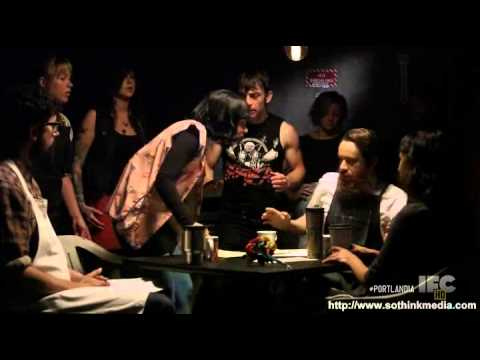

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [3]:
%pwd

'C:\\Users\\David.000\\Desktop\\Lambda\\U4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
shops.shape

(7616, 3)

In [6]:
strang = shops['star_rating'][0]
strang[1]

'5'

In [7]:
shops['rating'] = shops['star_rating'].apply(lambda x: int(x[1])-3)
shops[['rating']]

,rating
0,2
1,1
2,1
3,-1
4,1
...,...
7611,1
7612,2
7613,1
7614,0


In [8]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,1
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,1
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,-1
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,1


In [9]:
import seaborn as sns
import spacy
from spacy.tokenizer import Tokenizer
import re

In [10]:
nlp = spacy.load('en_core_web_lg')
tokenizer = Tokenizer(nlp.vocab)

In [11]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text']):

    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            lolo = re.sub('[^a-zA-Z]', '', token.text).lower()
        if lolo not in nlp.Defaults.stop_words:
            doc_tokens.append(lolo)
            
    tokens.append(doc_tokens)

shops['tokens'] = tokens
shops.head()

,coffee_shop_name,full_review_text,star_rating,rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2,"[, , , checkin, love, love, loved, loved, atmo..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,1,"[, , listed, listed, date, night, austin, ambi..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,1,"[, , , checkin, listed, listed, brunch, spots,..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,-1,"[, , , cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,1,"[, , , checkin, checkin, checkin, located, loc..."


In [12]:
shops.tokens.head()

0    [, , , checkin, love, love, loved, loved, atmo...
1    [, , listed, listed, date, night, austin, ambi...
2    [, , , checkin, listed, listed, brunch, spots,...
3    [, , , cool, decor, good, drinks, nice, seatin...
4    [, , , checkin, checkin, checkin, located, loc...
Name: tokens, dtype: object

In [13]:
# import re

# sample = shops['full_review_text'][0]

# re.sub('[^a-zA-Z 0-9]', '', sample)

In [14]:
shops[['full_review_text','tokens']].head()

,full_review_text,tokens
0,11/25/2016 1 check-in Love love loved the atm...,"[, , , checkin, love, love, loved, loved, atmo..."
1,"12/2/2016 Listed in Date Night: Austin, Ambia...","[, , listed, listed, date, night, austin, ambi..."
2,11/30/2016 1 check-in Listed in Brunch Spots ...,"[, , , checkin, listed, listed, brunch, spots,..."
3,11/25/2016 Very cool decor! Good drinks Nice ...,"[, , , cool, decor, good, drinks, nice, seatin..."
4,12/3/2016 1 check-in They are located within ...,"[, , , checkin, checkin, checkin, located, loc..."


In [15]:
from collections import Counter

In [16]:
def count(docs):
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
    
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns = ['word', 'count'])
    
    wc['rank'] = wc['count'].rank(
        method='first', ascending=False
    )
    total = wc['count'].sum()
    
    wc['pct_total'] = wc['count'].apply(
        lambda x: x/total
    )
    
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(
       lambda x: x/total_docs 
    )
    
    return wc.sort_values(by='rank')

In [17]:
wc = count(shops['tokens'])
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
0,,7616,63203,1.0,0.082399,0.082399,1.000000
8,coffee,4877,18334,2.0,0.023902,0.106301,0.640362
129,place,3659,12626,3.0,0.016461,0.122762,0.480436
151,good,2788,6647,4.0,0.008666,0.131427,0.366071
169,like,2124,6123,5.0,0.007983,0.139410,0.278887
66,great,2836,5436,6.0,0.007087,0.146497,0.372374
43,austin,1788,4144,7.0,0.005403,0.151900,0.234769
495,time,1469,4023,8.0,0.005245,0.157145,0.192883
3,love,1500,3784,9.0,0.004933,0.162078,0.196954
13,shop,1331,3639,10.0,0.004744,0.166822,0.174764


In [18]:
stop_jargon = [
    '','coffee','place','austin','latte','checkin','ive','im','people',
    'shop','little','tea','got','food','drink','ice','know','day',
    'breakfast','milk'
]

In [19]:
STOP_WORDS = nlp.Defaults.stop_words.union(stop_jargon)

In [20]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text']):
    
    doc_tokens = []
    
    for token in doc:
        lolo = re.sub('[^a-zA-Z]', '', token.lemma_).lower()
        if lolo not in STOP_WORDS:
            doc_tokens.append(lolo)
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens
wc = count(shops['tokens'])
print(wc.shape)
wc.head(40)

(17753, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
140,good,3111,4668,1.0,0.015000,0.015000,0.408482
56,great,2851,3941,2.0,0.012664,0.027663,0.374343
155,like,2251,3333,3.0,0.010710,0.038373,0.295562
425,come,1847,2476,4.0,0.007956,0.046330,0.242516
3,love,1753,2290,5.0,0.007358,0.053688,0.230173
448,time,1670,2229,6.0,0.007162,0.060851,0.219275
86,try,1609,2043,7.0,0.006565,0.067415,0.211266
1,order,1369,2005,8.0,0.006443,0.073858,0.179753
40,nice,1496,1785,9.0,0.005736,0.079594,0.196429
599,work,1413,1780,10.0,0.005720,0.085314,0.185530


In [21]:
fives = shops[shops['rating']==2]
print('fives:', fives.shape[0])

fours = shops[shops['rating']==1]
print('fours:', fours.shape[0])

threes = shops[shops['rating']==0]
print('threes:', threes.shape[0])

twos = shops[shops['rating']==-1]
print('twos:', twos.shape[0])

ones = shops[shops['rating']==-2]
print('ones:', ones.shape[0])

fives: 3780
fours: 2360
threes: 738
twos: 460
ones: 278


In [43]:
star_levels = [fives,fours,threes,twos,ones]

# wc = count(star_levels[0]['tokens'])
# words0 = wc['word']
# words0

for x in range(5):
    wc = count(star_levels[x]['tokens'])
    name = 'word' + str(x)
    vars()[name] = wc['word'].reset_index(drop=True)
    pct = 'pct' + str(x)
    vars()[pct] = wc['pct_total'].reset_index(drop=True)
    print(vars()[pct].shape)

(11293,)
(9872,)
(5234,)
(4162,)
(3068,)


In [39]:
wtf = count(fives['tokens'])
wtf.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
275,great,1559,2180,1.0,0.015827,0.015827,0.412434
38,good,1310,1883,2.0,0.013671,0.029498,0.346561
3,love,1075,1445,3.0,0.010491,0.039989,0.284392
102,like,891,1260,4.0,0.009148,0.049137,0.235714
142,come,809,1025,5.0,0.007442,0.056578,0.214021


In [44]:
by_rating = pd.DataFrame({
    'fives':word0.head(3068),
    'fives_pct':pct0.head(3068),
    'fours':word1.head(3068),
    'fours_pct':pct1.head(3068),
    'threes':word2.head(3068),
    'threes_pct':pct2.head(3068),
    'twos':word3.head(3068),
    'twos_pct':pct3.head(3068),
    'ones':word4,
    'ones_pct':pct4.head(3068)
})

by_rating.head(20)

,fives,fives_pct,fours,fours_pct,threes,threes_pct,twos,twos_pct,ones,ones_pct
0,great,0.015827,good,0.017112,good,0.017083,like,0.013815,order,0.013469
1,good,0.013671,great,0.012318,like,0.013424,good,0.013678,like,0.013314
2,love,0.010491,like,0.010915,come,0.008556,order,0.011900,service,0.009908
3,like,0.009148,come,0.007974,order,0.007937,come,0.009255,time,0.009598
4,come,0.007442,try,0.007019,great,0.007818,time,0.008526,come,0.009521
5,friendly,0.007100,time,0.006723,time,0.007612,service,0.006976,good,0.008824
6,time,0.006941,nice,0.006713,nice,0.007022,great,0.006611,ask,0.007818
7,delicious,0.006549,order,0.006083,pretty,0.006963,want,0.006201,customer,0.006812
8,try,0.006512,work,0.006045,dont,0.006727,dont,0.006018,dont,0.006502
9,work,0.005532,love,0.005672,try,0.006166,taste,0.005882,try,0.006115


In [27]:
# food = 'bread'+str(5)
# vars()[food] = 123
# print(bread5)

123


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [47]:
tenwords = by_rating.head(10)

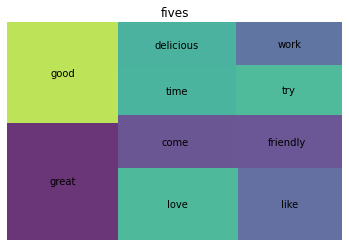

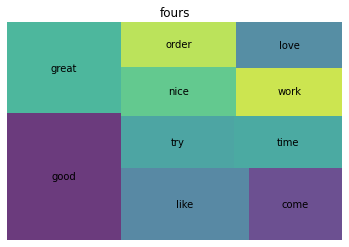

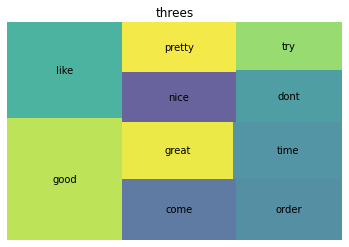

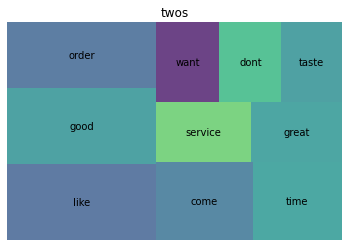

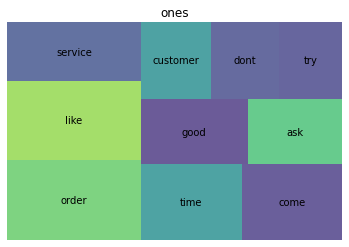

In [53]:
import squarify
import matplotlib.pyplot as plt

for x in range(5):
    squarify.plot(
        sizes=tenwords.iloc[:,((2*x)+1)],
        label=tenwords.iloc[:,(2*x)],
        alpha=.8
    )
    plt.axis('off')
    plt.title(tenwords.columns[2*x])
    plt.show()

In [ ]:
# skewer = 
# .reset_index(drop=True)

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

